## Acquire Function

>Importing host, user, and password from env module<br>
>Importing os and pandas modules

In [1]:
from env import host, user, password
import pandas as pd
import os

>url string that will be used to connect to db

In [2]:
database = 'mall_customers'
url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

>Reading SQL query into a df using the query string, url string, and `customer_id` as the index column

In [3]:
query = 'select * from customers'
mall_df = pd.read_sql(query, url, index_col = 'customer_id')

In [4]:
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


>## `acquire_data()` function

In [14]:
def acquire_data(file_name, index_col, database, query):
    '''
THIS FUNCTION TAKES IN:
    (1) A CSV FILE NAME ***INCLUDE .CSV EXT****, 
    (2) COLUMN FROM TABLE TO BE USED AS DATAFRAME INDEX, 
    (3) DATABASE NAME, AND 
    (4) SQL QUERY STRING 
AND RETURNS A PANDAS DF BY:
        (i.) CHECKING TO SEE IF LOCAL CSV FILE WITH DATA EXISTS
        (ii.) WRITING THE LOCAL CSV FILE OT PANDAS DF 
OR, IF LOCAL CSV DOES NOT EXIST:
        (i.) IMPORTING DATABASE CONNECTION CREDENTIALS
        (ii.) USING CREDENTIALS TO CREATE DATABASE CONNECTION STRING
        (iii.) READING THE SQL QUERY INTO A DF
        (iv.) CACHING DF AND SAVING DATA AS LOCAL CSV FILE
    '''
    # checking for local csv file
    if os.path.isfile(file_name):
        
        # reading csv file to pandas df
        df = pd.read_csv(file_name, index_col = index_col)
        
    # if no local csv file
    else:

        # url database connection string
        url = f'mysql+pymysql://{user}:{password}@{host}/{database}'

        # reading sql query into df using query, url string, and index_col parameter
        df = pd.read_sql(query, url, index_col)
        
        # write df to local csv file
        df.to_csv(file_name)
    
    return df    

In [15]:
test_df = acquire_data('mall_data.csv', 'customer_id', 'mall_customers', 'select * from customers')

In [16]:
test_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Summarize Function

In [96]:
# 0) df preview
mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [25]:
# 1) shape
print('DataFrame Shape')
print('--------------------')
print(f'Rows: {mall_df.shape[0]}\nColumns: {mall_df.shape[1]}')
print()

DataFrame Shape
--------------------
Rows: 200
Columns: 4



>200 observations and 4 variables

In [21]:
# 2) info
print('DataFrame Info')
print('--------------------')
mall_df.info()
print()

DataFrame Info
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB



>No null values<br>
x3 variables with int dtype and x1 as object

In [28]:
# 3) descriptive stats

print('DataFrame Stats')
print('--------------------')
mall_df.describe()

DataFrame Stats
--------------------


,age,annual_income,spending_score
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


>will need to scale numerical columns for modeling (different measurement units)

In [44]:
# 4) value counts for colums with 10 or less values

for col in mall_df.columns:
    if mall_df[col].nunique() <= 10:
        print(col.upper())
        print('-'*len(col))
        print(mall_df[col].value_counts())
        print('_____________________________')
        print()
    else:
        print(col.upper())
        print('-'*len(col))
        print('This column has > 10 values')
        print('_____________________________')
        print()

GENDER
------
Female    112
Male       88
Name: gender, dtype: int64
_____________________________

AGE
---
This column has > 10 values
_____________________________

ANNUAL_INCOME
-------------
This column has > 10 values
_____________________________

SPENDING_SCORE
--------------
This column has > 10 values
_____________________________



##### will need to encode gender (binary variable)

> ## `summarize()` function

## Nulls Function

#### Even though there are no nulls in this data, I want to create a function that can summarize and handle nulls by rows and columns

In [84]:
# number of nulls rows in each column
# will also be numerator in percentage missing function
mall_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [85]:
# total values in each column (will be denominator in percentage missing fraction)
mall_df.shape[0]

200

> ## `nulls_by_col()` function

In [104]:
def nulls_by_col(df):
    '''
THIS FUNCTION TAKES IN A DATAFRAME AND RETURNS A DATAFRAME WHERE THE FIRST COLUMN SHOWS THE
NUMBER OF NULLS IN EACH COLUMN AND THE SECOND COLUMN SHOWS THE PERCENTAGE OF VALUES IN EACH
COLUMN. THE FINAL DF IS SORTED BY THE PERCENTAGE OF NULLS IN DESCENDING ORDER. 
    '''
    
    num_missing = df.isnull().sum()
    
    rows = df.shape[0]
    
    pct_missing = num_missing / rows
    
    nulls_df = pd.DataFrame({'no_nulls_in_col': num_missing, 'pct_nulls_in_col': pct_missing})\
    .sort_values('pct_nulls_in_col', ascending = False)
    
    return nulls_df

In [105]:
nulls_by_col(mall_df)

,no_nulls_in_col,pct_nulls_in_col
gender,0,0.00
age,0,0.00
annual_income,0,0.00
spending_score,0,0.00


In [97]:
# number of null columns in each row

mall_df.isnull().sum(axis = 1)

customer_id
1      0
2      0
3      0
4      0
5      0
      ..
196    0
197    0
198    0
199    0
200    0
Length: 200, dtype: int64

In [99]:
# value_count of null values in each row

mall_df.isnull().sum(axis = 1).value_counts()

0    200
dtype: int64

>There are **`200`** rows with **`0`** null values

In [136]:
def nulls_by_row(df):
    
    df2 = pd.DataFrame(df.isnull().sum(axis = 1), columns = ['no_cols_with_nulls']).reset_index().groupby('no_cols_with_nulls').count().reset_index()\
    .rename(columns = {'index': 'no_rows'})
                      
    df2['pct_nulls_in_row'] = df2.no_cols_with_nulls/df.shape[1]
                      
    return df2

In [137]:
nulls_by_row(mall_df)

,no_cols_with_nulls,customer_id,pct_nulls_in_row
0,0,200,0.00


> `customer_id` column should have been renamed `no_rows` will come back to this

## Prepare Function

>Outliers

### Plots histograms for each variable

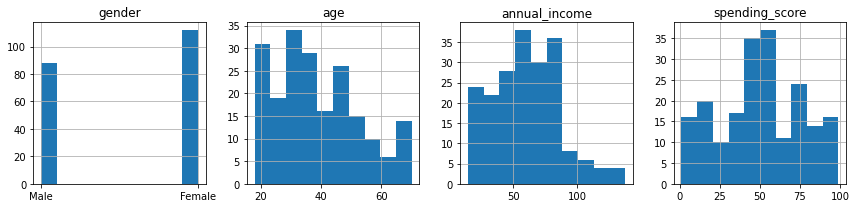

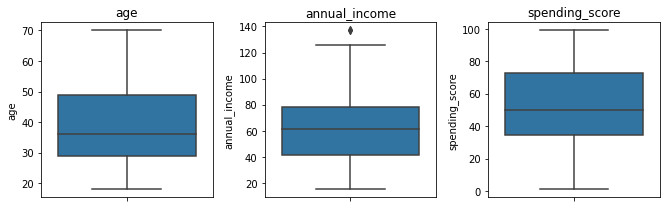

In [166]:
plt.figure(figsize = (12, 3))

for i, col in enumerate(mall_df.columns):
    
    plot_number = i + 1
    
    plt.subplot(1, len(mall_df.columns), plot_number)
    
    plt.title(col)
    
    mall_df[col].hist()
    
    plt.tight_layout()
    
plt.show()

plt.figure(figsize = (12, 3))

for i, col in enumerate(mall_df.columns):
    
    if mall_df[col].dtype != 'O':
    
        plot_number = i + 1

        plt.subplot(1, len(mall_df.columns), plot_number)

        plt.title(col)

        sns.boxplot(y = mall_df[col])

        plt.tight_layout()
    
plt.show()

### Plot boxplots for each variable

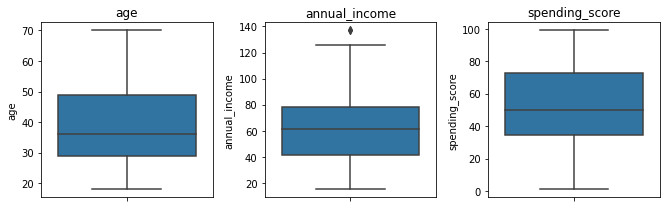

In [163]:
import seaborn as sns

plt.figure(figsize = (12, 3))

for i, col in enumerate(mall_df.columns):
    
    if mall_df[col].dtype != 'O':
    
        plot_number = i + 1

        plt.subplot(1, len(mall_df.columns), plot_number)

        plt.title(col)

        sns.boxplot(y = mall_df[col])

        plt.tight_layout()
    
plt.show()

In [139]:
def remove_outliers(df, outlier_cols, k):
    
    for col in df[outlier_cols]:
        q1 = df[col].quantile(.25)
        q3 = df[col].quantile(.75)
        
        iqr = q3 - q1
        
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
        
    return df

In [140]:
remove_outliers(mall_df, ['age', 'spending_score', 'annual_income'], 50)


,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
